<a href="https://colab.research.google.com/github/faithNassiwa/predictive-diagnosis-assistant/blob/main/Hierarchical_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette Score: 0.7542265247149782


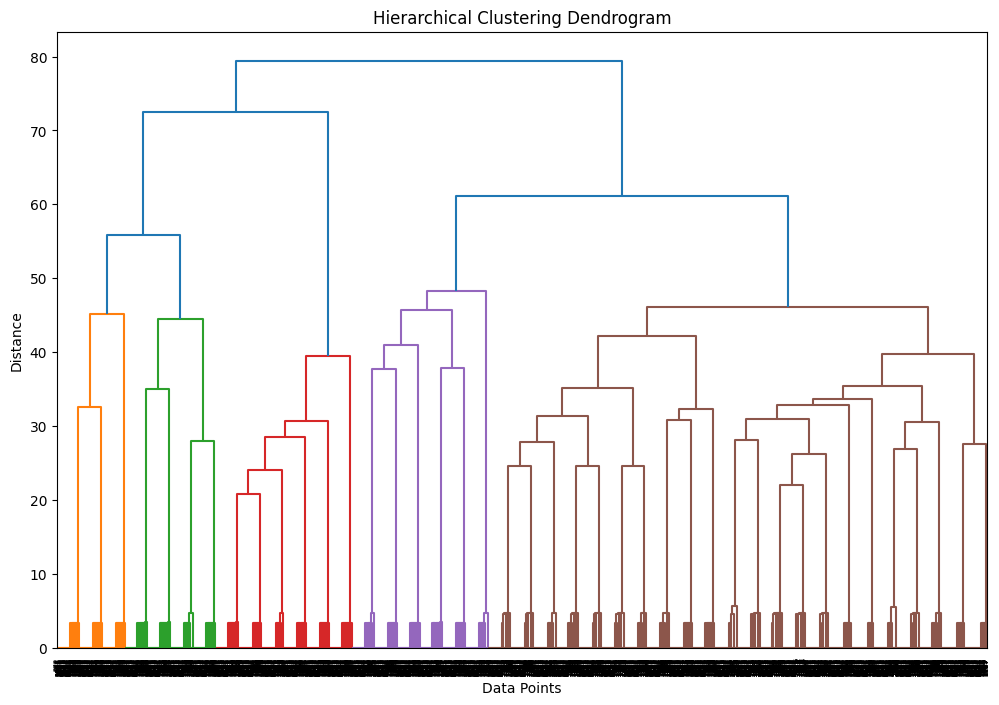

In [33]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

symptom_data = pd.read_csv("/content/Training.csv", usecols = lambda col: col not in ["Unnamed: 133"])
symptom_data = symptom_data.iloc[:, :-1]

symptom_matrix = symptom_data.to_numpy()

linked = linkage(symptom_matrix, method='ward', metric='euclidean')
threshold = 10
labels = fcluster(linked, t=threshold, criterion='distance')

silhouette_avg = silhouette_score(symptom_matrix, labels)
print(f"Silhouette Score: {silhouette_avg}")

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()



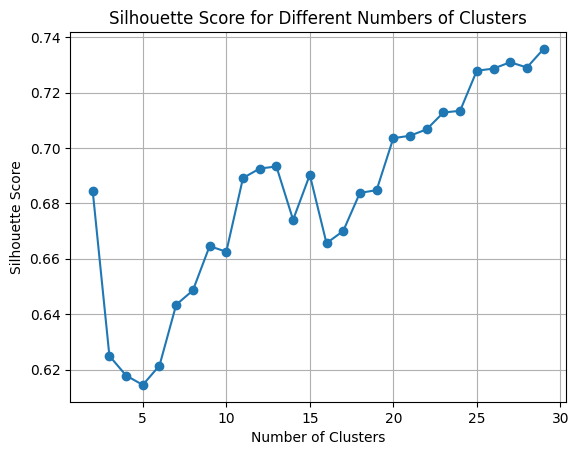

Optimal number of clusters: 29
Silhouette Score: 0.7357357778525495


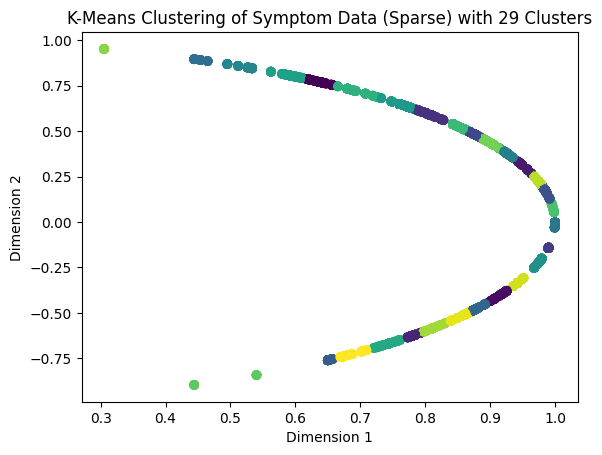

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score

symptom_data = pd.read_csv("/content/Training.csv", usecols=lambda col: col not in ["Unnamed: 133"])
symptom_data = symptom_data.iloc[:, :-1]

data = symptom_data.to_numpy()

num_components = 2
svd = TruncatedSVD(n_components=num_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
data_reduced = lsa.fit_transform(data)

# Find the optimal number of clusters using Silhouette Score
possible_clusters = np.arange(2, 30)
silhouette_scores = []

for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  # Set n_init explicitly to 10
    kmeans.fit(data_reduced)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_reduced, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores for different numbers of clusters
plt.plot(possible_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Based on the plot, select the optimal number of clusters and perform K-Means clustering
optimal_num_clusters = possible_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_num_clusters}")

kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=10)  # Set n_init explicitly to 10
kmeans.fit(data_reduced)
labels = kmeans.labels_
silhouette_avg = silhouette_score(data_reduced, labels)
print(f"Silhouette Score: {silhouette_avg}")
# Visualize the clustered data
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis')
plt.title(f'K-Means Clustering of Symptom Data (Sparse) with {optimal_num_clusters} Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


Silhouette Score: 0.74320151742132


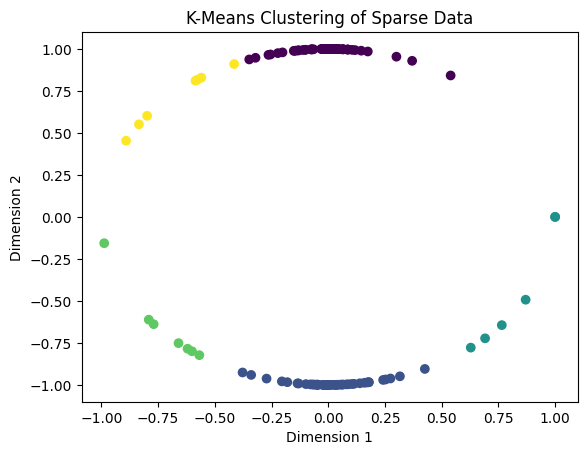

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score


symptom_data = pd.read_csv("/content/Training.csv", usecols=lambda col: col not in ["Unnamed: 133"])
symptom_data = symptom_data.iloc[:, :-1]

tfidf_vectorizer = TfidfVectorizer()
data_sparse = tfidf_vectorizer.fit_transform(symptom_data.astype(str))


num_components = 2  # You can adjust the number of components
svd = TruncatedSVD(n_components=num_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

data_reduced = lsa.fit_transform(data_sparse)

# Perform K-Means clustering on the reduced data
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(data_reduced)

# Get cluster labels
labels = kmeans.labels_

silhouette_avg = silhouette_score(data_reduced, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clustered data
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering of Sparse Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


Silhouette Score: 0.4692389720692761


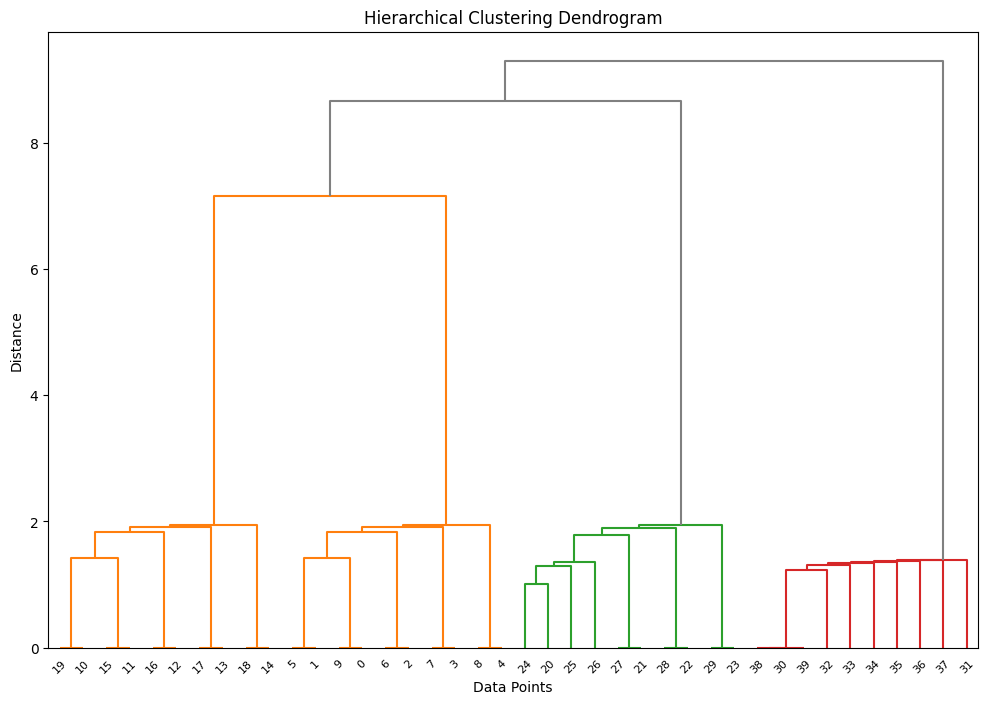

In [ ]:

symptom_data = symptom_data[:40]
symptom_matrix = symptom_data.to_numpy()
linked = linkage(symptom_matrix, method='ward', metric='euclidean')
threshold = 8
labels = fcluster(linked, t=threshold, criterion='distance')
silhouette_avg = silhouette_score(symptom_matrix, labels)
print(f"Silhouette Score: {silhouette_avg}")

plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    above_threshold_color='gray',
    color_threshold=threshold,
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [ ]:
symptom_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
